Lineraization:

binary*continuous

C = b * x

similar to

-bM <= c <= bm

-(1-b)M <= c-x <= (1-b)m

b is binary

Here you have that A minus B times a big M is less or equal to see that is less or equal to be times

bigger than.

Also, you have another constraint where minus one minus B times bigger is less or equal to C minus

X less or equal to.

To one minus B times the M, and in these constraints, Big M is in fact a large number is not optimization.

Variable is a number that you define.

This number must be a great number that makes possible that C gets any value.

In this case, the Big M must be greater than the greatest value of X.

In practical problems, normally these Big M is equal to one million or one hundred thousand, but it

really depends on your problem.

b=0 then c =0

b=1 then c =x

#Problem

Suppose that you have 3 machines to manufacture shoes and the cost of each machine is :

C1= 2*n1

C2= 6*n2

c3=7*n3


where Ci is cost for production  of machine i ,

ni is the number of shows manufactured in machine

each machine has a limit of production of 1000 shoes

machine 2 has a start cost of 100 #this is thing that differentiate linearizaion

for a total production of 2100 shoes, how many shoes should each machine made in order to minimize the total cost?

#Solution

objective Function : min C1+C2+C3

Constraints:

n1+n2+n3= 2100

C1= 2n1

C2= b* (6n2+1000) #here b is a bindary...b=1 means that machine 2 is ON
                                         b=0 means that machine 2 is Off
                                    
n3<=b*1000   X=1000, (in c2 the 1000 means thousands shoes

c3=7n3

0 <= n1,n2,n3 <=1000

#installation of pyomo

In [ ]:
 !pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!pip install pyomo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
!conda install -c conda-forge glpk


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - glpk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-23.3.1               |  py310hff52083_0         941 KB  conda-forge
    glpk-5.0                   |       h445213a_0        1023 KB  conda-forge
    gmp-6.2.1                  |       h58526e2_0         806 KB  conda-forge
    jsonpatch-1.32             |     pyhd8ed1ab_0          14 KB  conda-forge
    jsonpointer-2.0            |             py_0           9 KB  conda-forge
    openssl-3.1.1          

#Code

In [ ]:
import pyomo.environ as pyo, numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

#creation of the model and variables
model = pyo.ConcreteModel()
model.C = pyo.Var(range(1,4))
model.n = pyo.Var(range(1,4), within=Integers, bounds=(0,1000))
model.b = pyo.Var(within=Binary)
C = model.C
n = model.n
b = model.b

M = 100000

#objective function
model.obj = pyo.Objective(expr = pyo.summation(C))

#constraint
model.total = pyo.Constraint(expr = pyo.summation(n) == 2100)
model.C1 = pyo.Constraint(expr = C[1] == 2*n[1])


#glpk solver i can not directly write the expression model.C2=pyo.Constraint(exp C[2] == b* (6*n[2]+1000))......we can use this on gurobi
model.C2a = pyo.Constraint(expr = -b*M <= C[2])
model.C2b = pyo.Constraint(expr = C[2] <= b*M)
model.C2c = pyo.Constraint(expr = -(1-b)*M <= C[2] - (6*n[2]+1000))
model.C3c = pyo.Constraint(expr = C[2] - (6*n[2]+1000) <= (1-b)*M)

model.C2n = pyo.Constraint(expr = n[2] <= b*1000)
model.C3 = pyo.Constraint(expr = C[3] == 7*n[3])

#solve
opt = SolverFactory('glpk')
opt.solve(model)

#print
print('n1', pyo.value(n[1]))
print('n2', pyo.value(n[2]))
print('n3', pyo.value(n[3]))
print('nTotal', pyo.value(pyo.summation(n)))

print('C1', pyo.value(C[1]))
print('C2', pyo.value(C[2]))
print('C3', pyo.value(C[3]))
print('CTotal', pyo.value(pyo.summation(C)))



n1 1000.0
n2 1000.0
n3 100.0
nTotal 2100.0
C1 2000.0
C2 7000.0
C3 700.0
CTotal 9700.0


#PArt 2


Lineraization:

binary * binary

C = b1 * b1

similar to

c=z #Z is the auxiliary varivables

z<=b1

z<=b2

z >= b1+b2-1


b is binary


b1 b2 must be zero

#Problem

Suppose that you have 3 machines to manufacture shoes and the cost of each machine is :

C1= 2*n1

C2= 6*n2

c3=7*n3


where Ci is cost for production  of machine i ,

ni is the number of shows manufactured in machine

each machine has a limit of production of 1000 shoes

machine 2 can only be ON if Machine 1 is ON


for a total production of 2100 shoes, how many shoes should each machine made in order to minimize the total cost?

#Solution

objective Function : min C1+C2+C3

Constraints:

n1+n2+n3= 2100

C1= 2n1
n1<=b1*1000 #here b is a bindary...b=1 means that machine 2 is ON b=0 means that machine 2 is Off

C2= 6*n2

n2<=b1*b2*1000
                                     

c3=7n3

0 <= n1,n2,n3 <=1000

In [ ]:
import pyomo.environ as pyo, numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

#creation of the model and variables
model = pyo.ConcreteModel()
model.C = pyo.Var(range(1,4))
model.n = pyo.Var(range(1,4), within=Integers, bounds=(0,1000))
model.b = pyo.Var(range(1,4),within=Binary)
model.z = pyo.Var(within=Binary)
C = model.C
n = model.n
b = model.b
z = model.z

#objective function
model.obj = pyo.Objective(expr = pyo.summation(C))

#constraint
model.total = pyo.Constraint(expr = pyo.summation(n) == 2100)
model.C1 = pyo.Constraint(expr = C[1] == 2*n[1])
model.C1n = pyo.Constraint(expr = n[1] <= b[1]*1000)
model.C2 = pyo.Constraint(expr = C[2] == 6*n[2])
model.C2na = pyo.Constraint(expr = n[2] <= z*1000)
model.C2nb = pyo.Constraint(expr = z <= b[1])
model.C2nc = pyo.Constraint(expr = z <= b[2])
model.C2nd = pyo.Constraint(expr = z >= b[1]+b[2]-1)

model.C3 = pyo.Constraint(expr = C[3] == 7*n[3])

#solve
opt = SolverFactory('glpk')
opt.solve(model)

#print
print('n1', pyo.value(n[1]))
print('n2', pyo.value(n[2]))
print('n3', pyo.value(n[3]))
print('nTotal', pyo.value(pyo.summation(n)))

print('\nb1', pyo.value(b[1]))
print('b2', pyo.value(b[2]))

print('\nC1', pyo.value(C[1]))
print('C2', pyo.value(C[2]))
print('C3', pyo.value(C[3]))
print('CTotal', pyo.value(pyo.summation(C)))



n1 1000.0
n2 1000.0
n3 100.0
nTotal 2100.0

b1 1.0
b2 1.0

C1 2000.0
C2 6000.0
C3 700.0
CTotal 8700.0


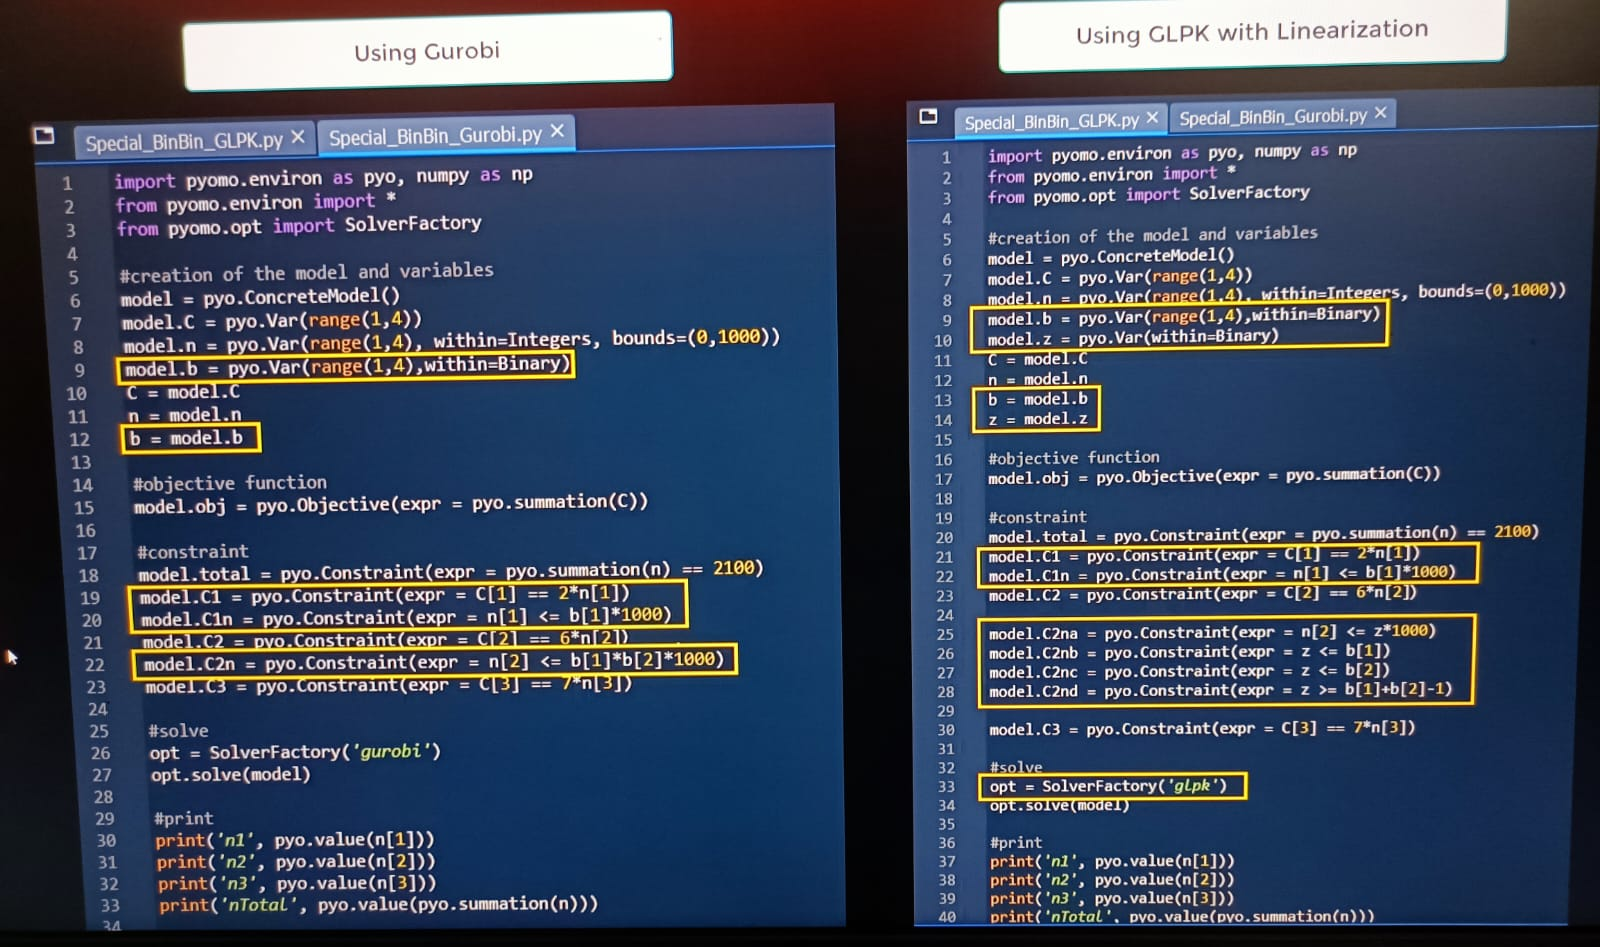